# Data Preparation

### Import Libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset

We use the Ames Housing dataset https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset/data, which contains information about residential properties in Ames, Iowa, USA. The dataset has 79 features for modeling, with the target variable being SalePrice 

In [106]:
dataset = pd.read_csv("AmesHousing.csv")

Let's have a look at dataset table

In [107]:
dataset.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [108]:
dataset.info

<bound method DataFrame.info of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Al

### Dealing with outliers

In [109]:
pd.DataFrame([dataset.corr(numeric_only=True)['SalePrice'].sort_values()])

,PID,Enclosed Porch,Kitchen AbvGr,Overall Cond,MS SubClass,Low Qual Fin SF,Bsmt Half Bath,Order,Yr Sold,Misc Val,...,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
SalePrice,-0.246521,-0.128787,-0.119814,-0.101697,-0.085092,-0.03766,-0.035835,-0.031408,-0.030569,-0.015691,...,0.532974,0.545604,0.558426,0.621676,0.63228,0.640401,0.647877,0.70678,0.799262,1.0


In [110]:
dataset_total =dataset

We find outliers by highlighting the houses with high quality or large size but has really low price.

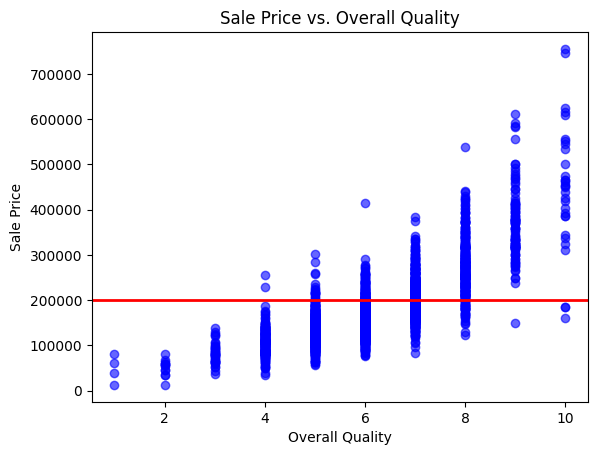

In [111]:
plt.scatter(dataset['Overall Qual'], dataset['SalePrice'], alpha=0.6, color='blue')

plt.axhline(y=200000, color='r', linewidth=2)

plt.title('Sale Price vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

plt.show()

In [112]:
dataset[(dataset['Overall Qual']>8) &(dataset['SalePrice']<200000)][['SalePrice', 'Overall Qual']]


,SalePrice,Overall Qual
1182,150000,9
1498,160000,10
2180,183850,10
2181,184750,10


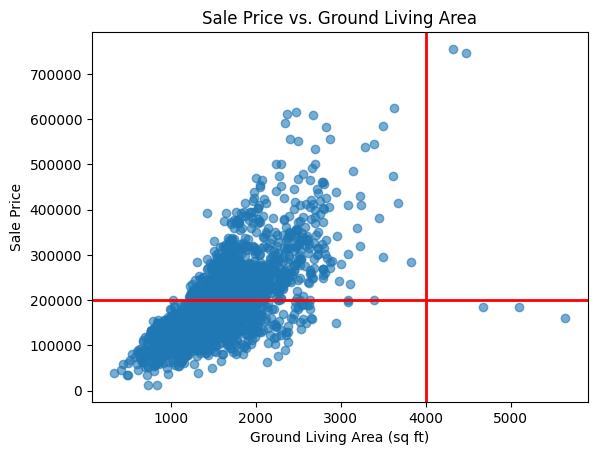

In [113]:
plt.scatter(dataset['Gr Liv Area'], dataset['SalePrice'], alpha=0.6)

plt.axhline(y=200000, color='r', linewidth=2)  
plt.axvline(x=4000, color='r',  linewidth=2)    

plt.title('Sale Price vs. Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')

plt.show()

In [114]:
dataset[(dataset['Gr Liv Area']>4000) & (dataset['SalePrice']<400000)][['SalePrice', 'Gr Liv Area']]


,SalePrice,Gr Liv Area
1498,160000,5642
2180,183850,5095
2181,184750,4676


We drop the outliers and see the result

In [115]:
drop_value=dataset[(dataset['Gr Liv Area']>4000) & (dataset['SalePrice']<400000)].index
dataset=dataset.drop(drop_value, axis=0)

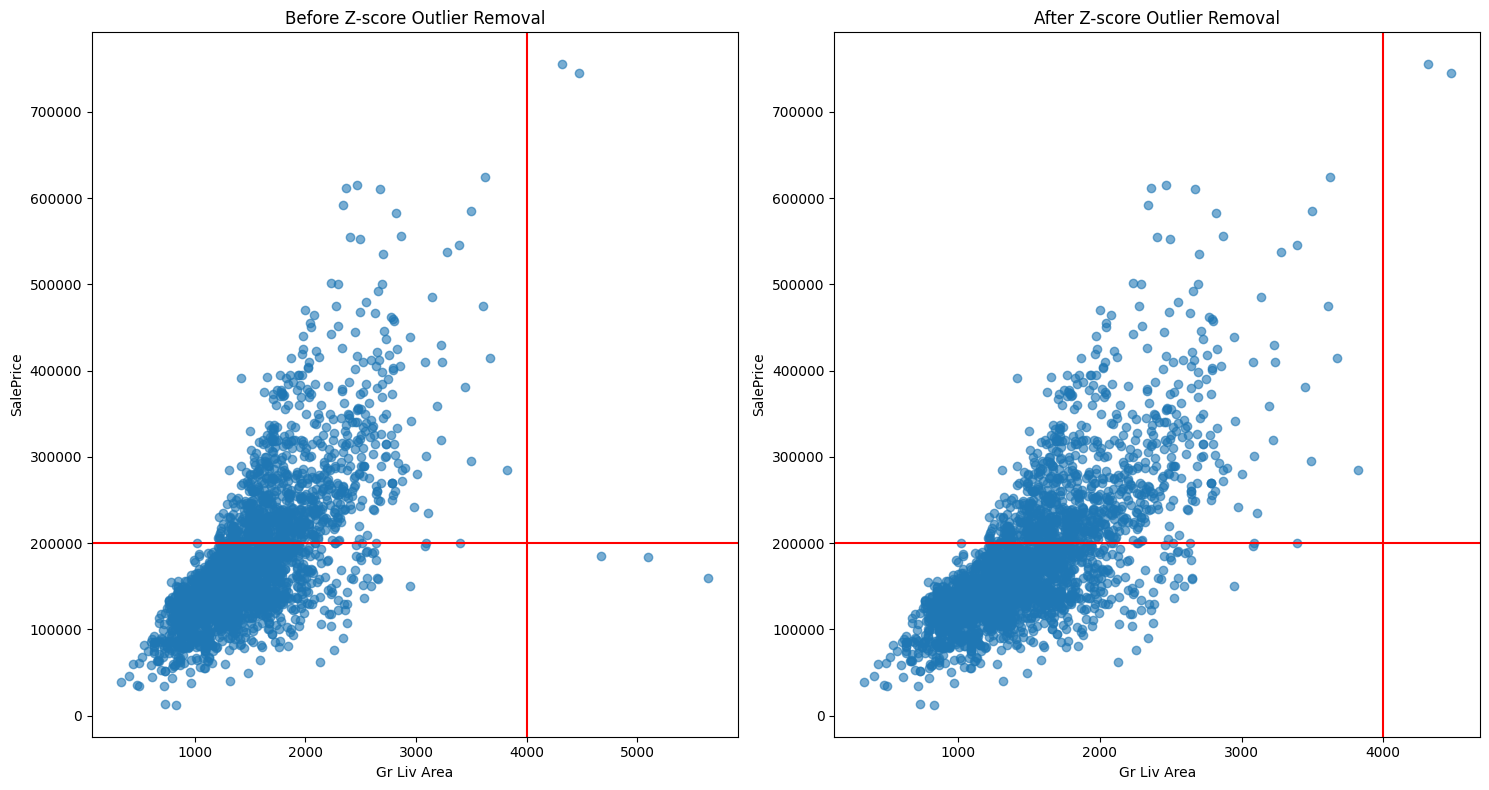

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Before Outlier Removal
axes[0].scatter(dataset_total['Gr Liv Area'], dataset_total['SalePrice'], alpha=0.6)
axes[0].set_title('Before Z-score Outlier Removal')
axes[0].axhline(y=200000, color='r', linestyle='-')
axes[0].axvline(x=4000, color='r', linestyle='-')
axes[0].set_xlabel('Gr Liv Area')
axes[0].set_ylabel('SalePrice')

# After Outlier Removal
axes[1].scatter(dataset['Gr Liv Area'], dataset['SalePrice'], alpha=0.6)
axes[1].set_title('After Z-score Outlier Removal')
axes[1].axhline(y=200000, color='r', linestyle='-')
axes[1].axvline(x=4000, color='r', linestyle='-')
axes[1].set_xlabel('Gr Liv Area')
axes[1].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()


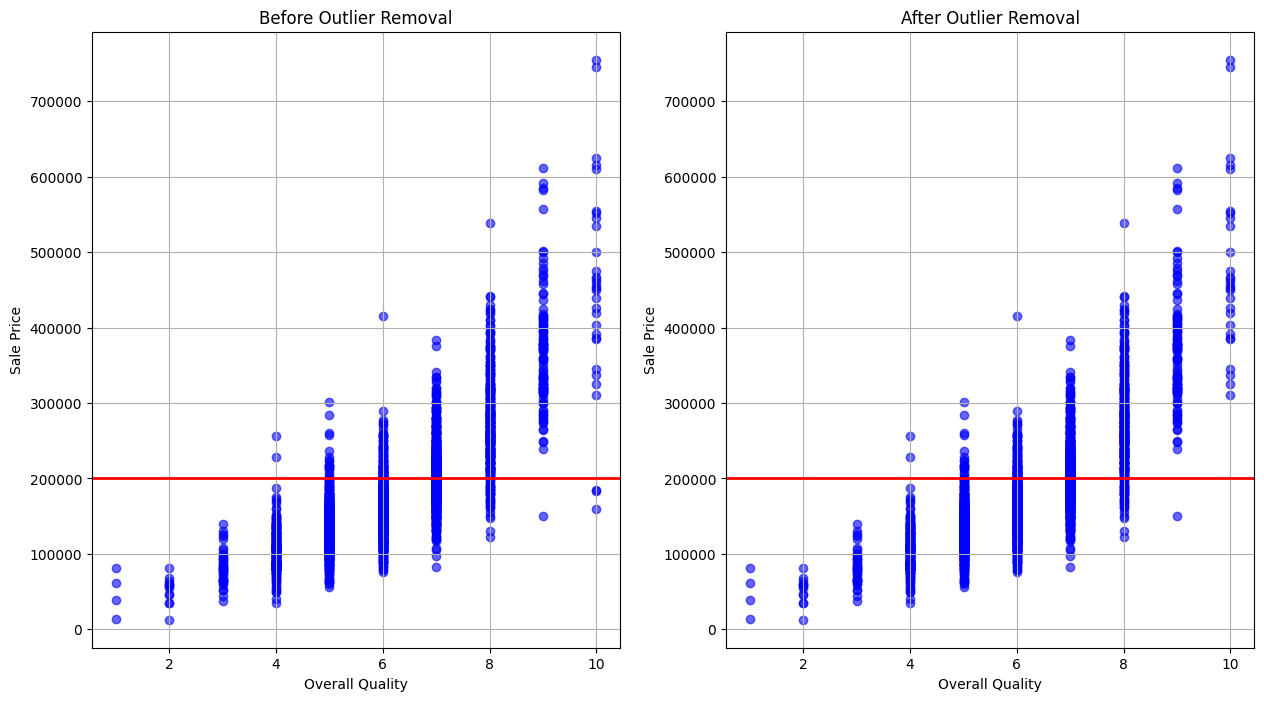

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Before Outlier Removal 
axes[0].scatter(dataset_total['Overall Qual'], dataset_total['SalePrice'], alpha=0.6, color='blue')
axes[0].axhline(y=200000, color='red', linestyle='-', linewidth=2)
axes[0].set_title('Before Outlier Removal')
axes[0].set_xlabel('Overall Quality')
axes[0].set_ylabel('Sale Price')
axes[0].grid(True)

# After Outlier Removal 
axes[1].scatter(dataset['Overall Qual'], dataset['SalePrice'], alpha=0.6, color='blue')
axes[1].axhline(y=200000, color='red', linestyle='-', linewidth=2)
axes[1].set_title('After Outlier Removal')
axes[1].set_xlabel('Overall Quality')
axes[1].set_ylabel('Sale Price')
axes[1].grid(True)

### Dealing with missing data

In [118]:
# remove redundant
dataset= dataset.drop('PID', axis=1)


In [119]:
dataset.head()


,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [120]:
dataset.isnull().sum()

Order               0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [121]:
num_missing = dataset.isnull().sum()
num_missing = num_missing[num_missing > 0]

percent_missing = num_missing * 100 / dataset.shape[0]

num_missing = num_missing.sort_values(ascending=False)
percent_missing = percent_missing[num_missing.index] 

print(f"{'Column':<20} {'Missing Values':<20} {'Percentage (%)':<20}")
print("-" * 60)

for col in num_missing.index:
    print(f"{col:<20} {num_missing[col]:<20} {percent_missing[col]:<20.2f}")

Column               Missing Values       Percentage (%)      
------------------------------------------------------------
Pool QC              2915                 99.59               
Misc Feature         2822                 96.41               
Alley                2729                 93.24               
Fence                2355                 80.46               
Mas Vnr Type         1775                 60.64               
Fireplace Qu         1422                 48.58               
Lot Frontage         490                  16.74               
Garage Cond          159                  5.43                
Garage Qual          159                  5.43                
Garage Finish        159                  5.43                
Garage Yr Blt        159                  5.43                
Garage Type          157                  5.36                
Bsmt Exposure        83                   2.84                
BsmtFin Type 2       81                   2.77           

### Checking on rows with missing data

(0.0, 1.0)

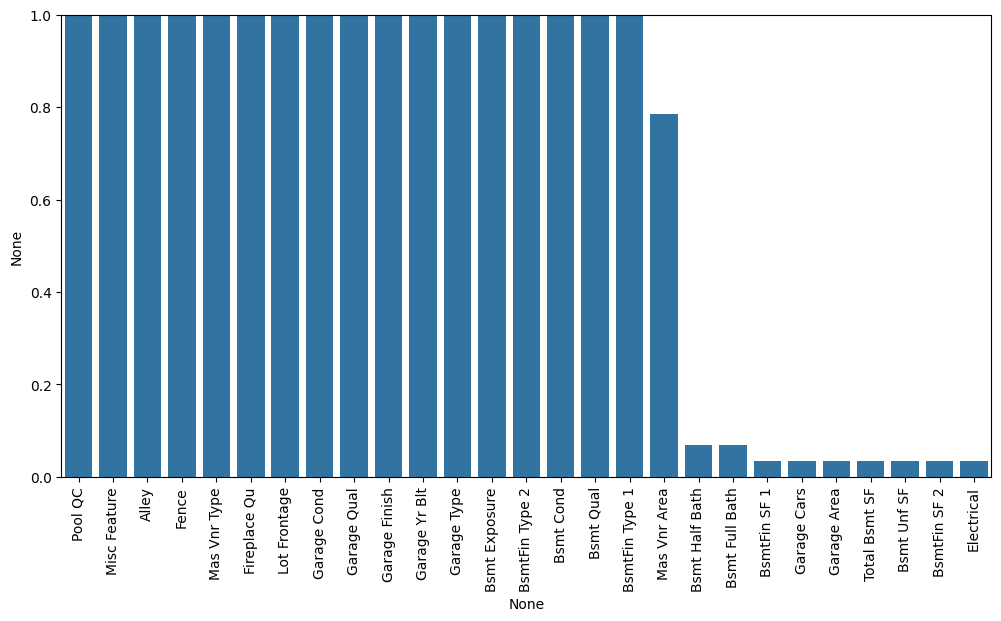

In [122]:
plt.figure(figsize=(12,6))
sns.barplot(x=percent_missing.index, y=percent_missing)
plt.xticks(rotation=90)

plt.ylim(0,1)

### Dealing with missing value

#### Pool QC Column

In [123]:
dataset["Pool QC"].fillna("No Pool", inplace=True)

/var/folders/x5/683_ldnx5v171npz27v9b_bm0000gn/T/ipykernel_4017/4191194624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Pool QC"].fillna("No Pool", inplace=True)


#### Misc Feature, Alley, Fence, Fireplace Qu Column, Lot Frontage

In [124]:
dataset['Misc Feature'].fillna('No Feature', inplace=True)
dataset['Alley'].fillna('No Alley', inplace=True)
dataset['Fence'].fillna('No Fence', inplace=True)
dataset['Fireplace Qu'].fillna('No Fireplace', inplace=True)
dataset['Lot Frontage'].fillna(0, inplace=True)

/var/folders/x5/683_ldnx5v171npz27v9b_bm0000gn/T/ipykernel_4017/966226482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Misc Feature'].fillna('No Feature', inplace=True)
/var/folders/x5/683_ldnx5v171npz27v9b_bm0000gn/T/ipykernel_4017/966226482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

#### Garage-related Columns

In [125]:
all_columns = dataset.columns

garage_columns = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 
                  'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']

missing_garage_cars = dataset[dataset['Garage Cars'].isna()]

missing_garage_cars[garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
dataset[dataset['Garage Cars'].isna()][garage_columns]


,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
dataset[~pd.isna(dataset['Garage Type']) & pd.isna(dataset['Garage Qual'])][garage_columns]


,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1356,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
dataset['Garage Cars'].fillna(0, inplace=True)
dataset['Garage Area'].fillna(0, inplace=True)
dataset['Garage Yr Blt'].fillna(0, inplace=True)

/var/folders/x5/683_ldnx5v171npz27v9b_bm0000gn/T/ipykernel_4017/2908280251.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Garage Cars'].fillna(0, inplace=True)
/var/folders/x5/683_ldnx5v171npz27v9b_bm0000gn/T/ipykernel_4017/2908280251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [129]:
dataset.loc[~pd.isna(dataset['Garage Type']) & 
            pd.isna(dataset['Garage Qual']), "Garage Type"] = "No Garage"

In [130]:
for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    dataset[col].fillna('No Garage', inplace=True)

/var/folders/x5/683_ldnx5v171npz27v9b_bm0000gn/T/ipykernel_4017/995677182.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna('No Garage', inplace=True)


In [131]:
dataset[dataset['Garage Type'] == 'No Garage'][garage_columns].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
27,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage
119,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage
125,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage
129,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage
130,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage


In [132]:
garage_columns = [col for col in dataset.columns if col.startswith("Garage")]
dataset[garage_columns].head(10)

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Attchd,1960.0,Fin,2.0,528.0,TA,TA
1,Attchd,1961.0,Unf,1.0,730.0,TA,TA
2,Attchd,1958.0,Unf,1.0,312.0,TA,TA
3,Attchd,1968.0,Fin,2.0,522.0,TA,TA
4,Attchd,1997.0,Fin,2.0,482.0,TA,TA
5,Attchd,1998.0,Fin,2.0,470.0,TA,TA
6,Attchd,2001.0,Fin,2.0,582.0,TA,TA
7,Attchd,1992.0,RFn,2.0,506.0,TA,TA
8,Attchd,1995.0,RFn,2.0,608.0,TA,TA
9,Attchd,1999.0,Fin,2.0,442.0,TA,TA


#### Basement-Related Columns

In [133]:
for col in ["Bsmt Half Bath", "Bsmt Full Bath", "Total Bsmt SF", 
            "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]:
    dataset[col].fillna(0, inplace=True)

/var/folders/x5/683_ldnx5v171npz27v9b_bm0000gn/T/ipykernel_4017/4104762994.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(0, inplace=True)


In [134]:
dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['Bsmt Exposure']), "Bsmt Exposure"] = "No"

In [135]:
dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['BsmtFin Type 2']), "BsmtFin Type 2"] = "Unf"

In [136]:
for col in ["Bsmt Exposure", "BsmtFin Type 2", 
            "BsmtFin Type 1", "Bsmt Qual", "Bsmt Cond"]:
    dataset[col].fillna("No Basement", inplace=True)

/var/folders/x5/683_ldnx5v171npz27v9b_bm0000gn/T/ipykernel_4017/2223391636.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna("No Basement", inplace=True)


#### Mas Vnr Columns

In [137]:
dataset['Mas Vnr Area'].fillna(0, inplace=True)
dataset['Mas Vnr Type'].fillna("None", inplace=True)

/var/folders/x5/683_ldnx5v171npz27v9b_bm0000gn/T/ipykernel_4017/321881725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Mas Vnr Area'].fillna(0, inplace=True)
/var/folders/x5/683_ldnx5v171npz27v9b_bm0000gn/T/ipykernel_4017/321881725.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

#### Electrical Column

In [138]:
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)


/var/folders/x5/683_ldnx5v171npz27v9b_bm0000gn/T/ipykernel_4017/1877895680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)


### Checking final dataset

In [139]:
dataset.isnull().sum() 

Order             0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 81, dtype: int64

In [140]:
dataset_num = dataset.select_dtypes(exclude='object')
dataset_obj = dataset.select_dtypes(include='object')

In [141]:
dataset_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   Lot Frontage     2927 non-null   float64
 3   Lot Area         2927 non-null   int64  
 4   Overall Qual     2927 non-null   int64  
 5   Overall Cond     2927 non-null   int64  
 6   Year Built       2927 non-null   int64  
 7   Year Remod/Add   2927 non-null   int64  
 8   Mas Vnr Area     2927 non-null   float64
 9   BsmtFin SF 1     2927 non-null   float64
 10  BsmtFin SF 2     2927 non-null   float64
 11  Bsmt Unf SF      2927 non-null   float64
 12  Total Bsmt SF    2927 non-null   float64
 13  1st Flr SF       2927 non-null   int64  
 14  2nd Flr SF       2927 non-null   int64  
 15  Low Qual Fin SF  2927 non-null   int64  
 16  Gr Liv Area      2927 non-null   int64  
 17  Bsmt Full Bath   29

In [142]:
dataset_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2927 non-null   object
 1   Street          2927 non-null   object
 2   Alley           2927 non-null   object
 3   Lot Shape       2927 non-null   object
 4   Land Contour    2927 non-null   object
 5   Utilities       2927 non-null   object
 6   Lot Config      2927 non-null   object
 7   Land Slope      2927 non-null   object
 8   Neighborhood    2927 non-null   object
 9   Condition 1     2927 non-null   object
 10  Condition 2     2927 non-null   object
 11  Bldg Type       2927 non-null   object
 12  House Style     2927 non-null   object
 13  Roof Style      2927 non-null   object
 14  Roof Matl       2927 non-null   object
 15  Exterior 1st    2927 non-null   object
 16  Exterior 2nd    2927 non-null   object
 17  Mas Vnr Type    2927 non-null   object
 18  Exter Qual   

In [143]:
dataset_obj = pd.get_dummies(dataset_obj, drop_first=True)
dataset_obj.shape

(2927, 237)

In [144]:
finaldata = pd.concat([dataset_num, dataset_obj], axis=1)
finaldata.head()

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,20,141.0,31770,6,5,1960,1960,112.0,639.0,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,False,True,False,False,False,True,False
2,3,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,False,True,False,False,False,True,False
3,4,20,93.0,11160,7,5,1968,1968,0.0,1065.0,...,False,False,False,False,True,False,False,False,True,False
4,5,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,False,True,False,False,False,True,False


# Data Analysis

We take a close look at how the different features in our dataset are connected, with a special focus on how each one relates to the sale price. To get a sense of these relationships, we calculate correlation values (which can go from -1 to +1), showing not just how strong the link is but also whether it’s positive or negative. To make it easy to spot patterns, we visualize all these correlations in a heatmap that includes both numerical and yes/no boolean features.

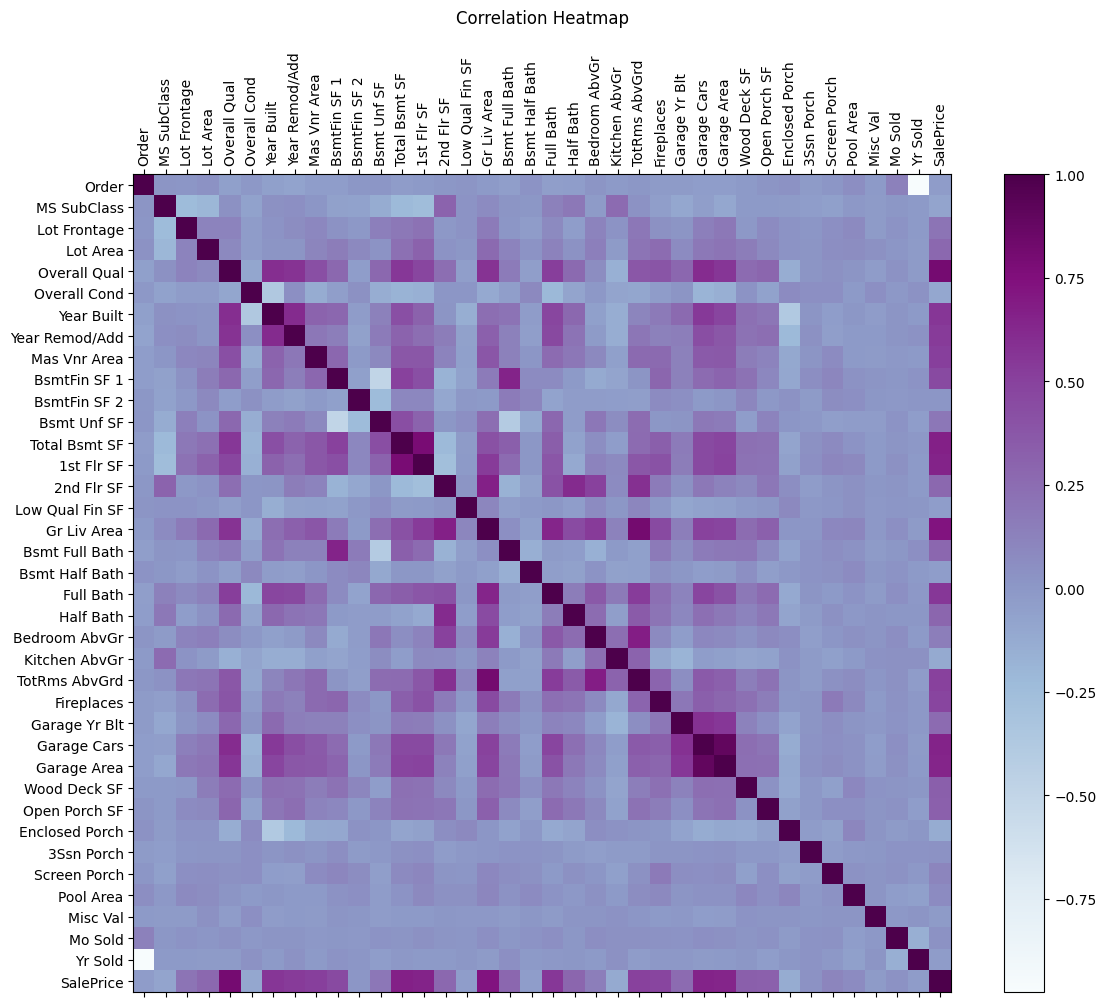

In [145]:
corr_matrix = dataset.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr_matrix, cmap='BuPu')

fig.colorbar(cax)

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

plt.title("Correlation Heatmap", pad=20)
plt.tight_layout()
plt.show()

The first histogram gives us a look at how above-ground living areas are spread out in our dataset. Most houses have a typical, mid-sized amount of living space, but there are also a few with much larger areas that stand out. The second histogram shows how house sale prices are distributed. Most homes are sold for prices in the middle range, but there are some that go for much higher amounts, creating a noticeable right skew.
Looking at these two charts together helps us understand the overall range of these important continuous features, and also makes it easier to spot any skewness or unusual values in the data.

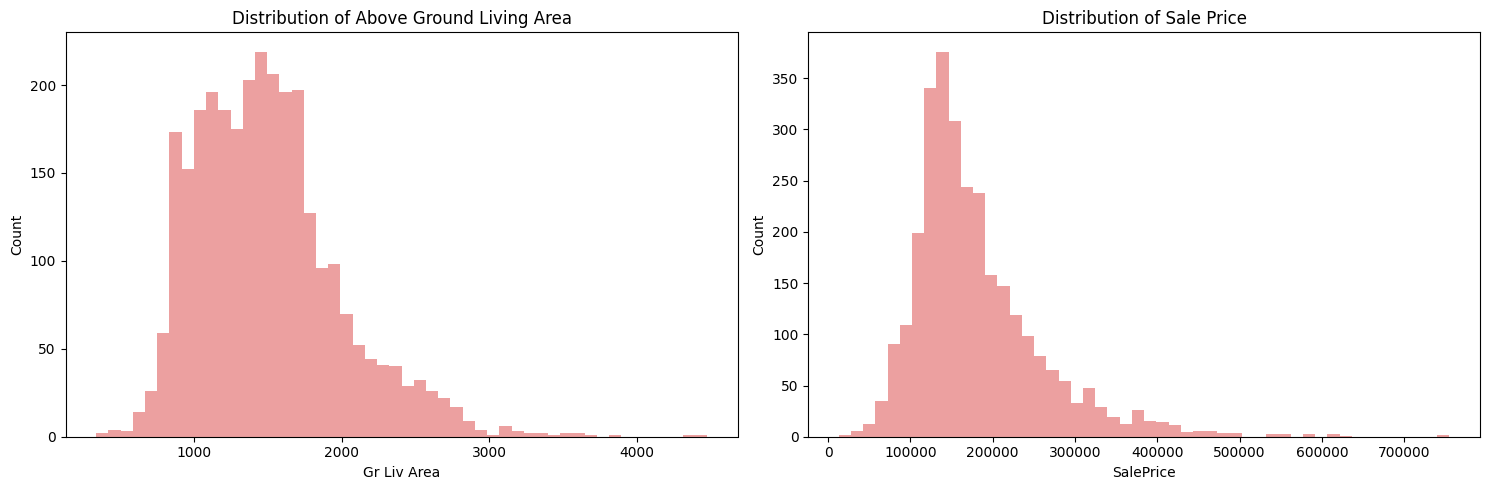

In [146]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Histogram for Gr Liv Area
axes[0].hist(dataset['Gr Liv Area'], bins=50, color="#E88888", alpha=0.8)
axes[0].set_title("Distribution of Above Ground Living Area")
axes[0].set_xlabel("Gr Liv Area")
axes[0].set_ylabel("Count")

# Histogram for SalePrice
axes[1].hist(dataset['SalePrice'], bins=50, color="#E88888", alpha=0.8)
axes[1].set_title("Distribution of Sale Price")
axes[1].set_xlabel("SalePrice")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

We looked at scatterplots to see how four different features above ground living area, basement size, garage area, and the year a home was built relate to sale price. There’s a clear positive link between living area and sale price, meaning bigger homes almost always fetch higher prices. Basement size also helps boost price, but its effect isn’t quite as strong. Garage area plays a role too, but it has a more moderate impact. Finally, we noticed that newer homes usually sell for more, which shows just how much buyers value recent construction.



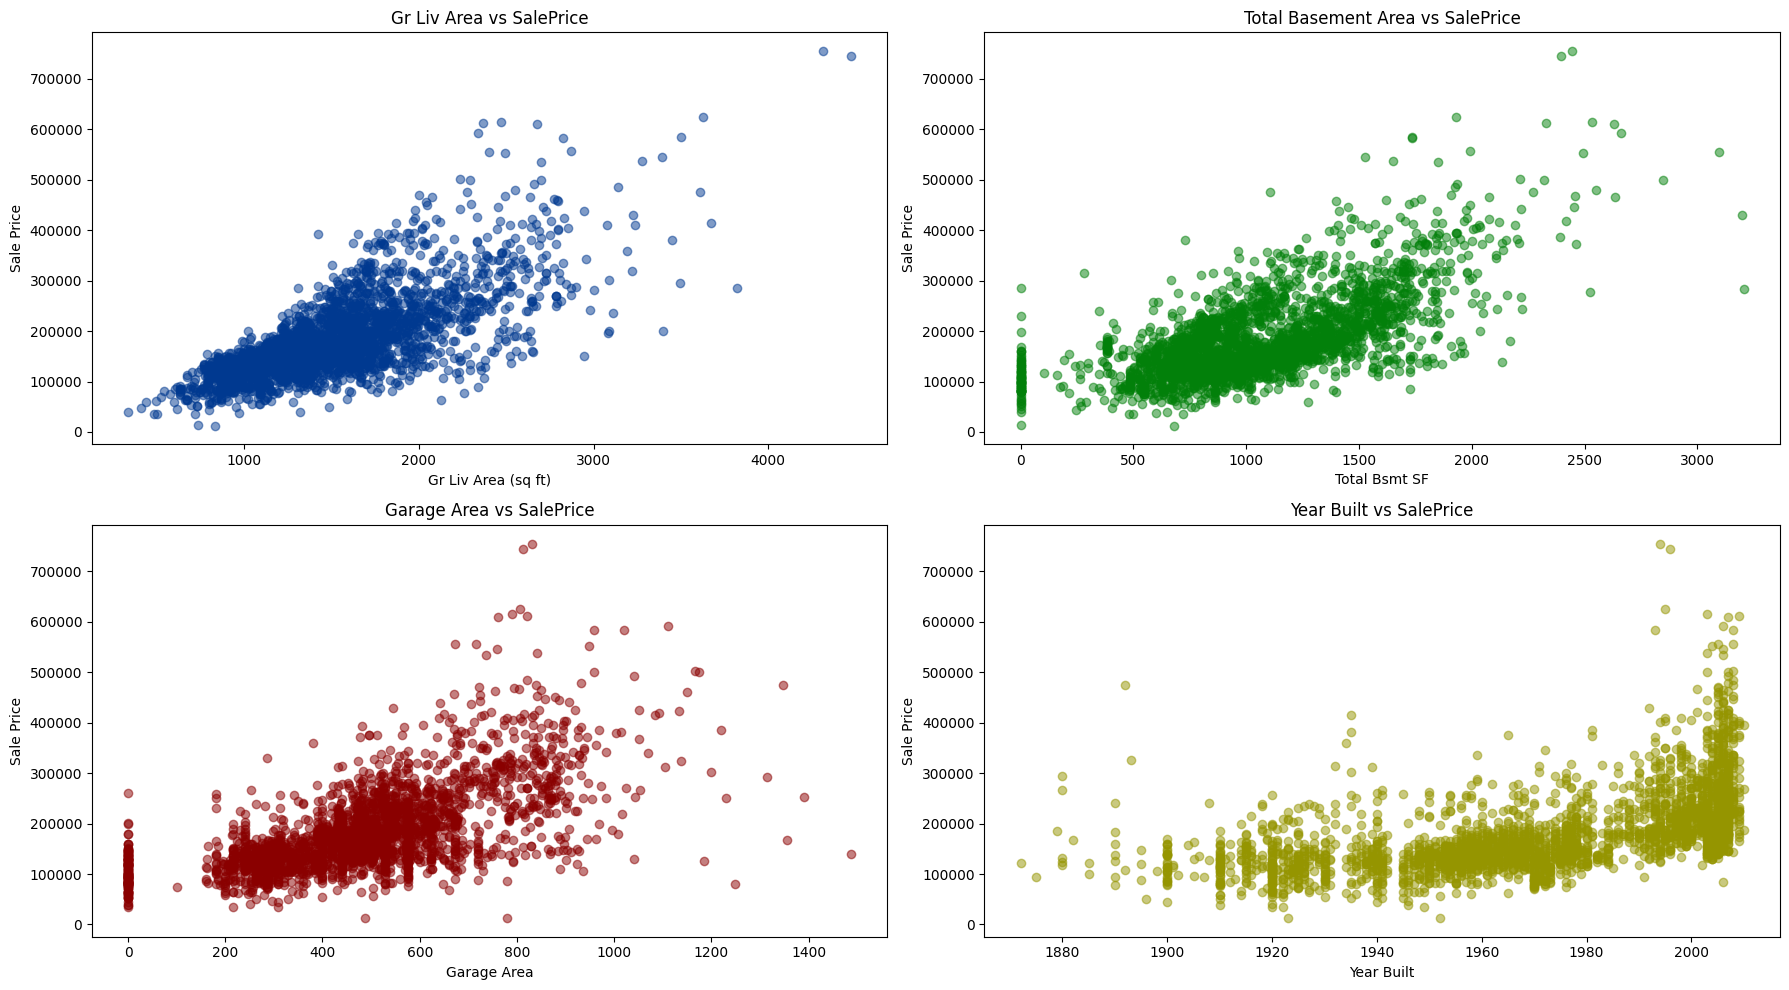

In [147]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Gr Liv Area vs SalePrice
axes[0, 0].scatter(dataset['Gr Liv Area'], dataset['SalePrice'], alpha=0.5, color="#003990")
axes[0, 0].set_title("Gr Liv Area vs SalePrice")
axes[0, 0].set_xlabel("Gr Liv Area (sq ft)")
axes[0, 0].set_ylabel("Sale Price")

# Total Bsmt SF vs SalePrice
axes[0, 1].scatter(dataset['Total Bsmt SF'], dataset['SalePrice'], alpha=0.5, color="#02800A")
axes[0, 1].set_title("Total Basement Area vs SalePrice")
axes[0, 1].set_xlabel("Total Bsmt SF")
axes[0, 1].set_ylabel("Sale Price")

# Garage Area vs SalePrice
axes[1, 0].scatter(dataset['Garage Area'], dataset['SalePrice'], alpha=0.5, color="#8A0000")
axes[1, 0].set_title("Garage Area vs SalePrice")
axes[1, 0].set_xlabel("Garage Area")
axes[1, 0].set_ylabel("Sale Price")

# Year Built vs SalePrice
axes[1, 1].scatter(dataset['Year Built'], dataset['SalePrice'], alpha=0.5, color="#959500")
axes[1, 1].set_title("Year Built vs SalePrice")
axes[1, 1].set_xlabel("Year Built")
axes[1, 1].set_ylabel("Sale Price")

plt.tight_layout()
plt.show()

The scatterplot shows a strong positive connection between the number of cars a garage can hold and its overall area basically, bigger garages tend to have room for more cars. Most of the data points cluster around garages that fit one to three cars, which suggests these are the most typical garage sizes found in our dataset.

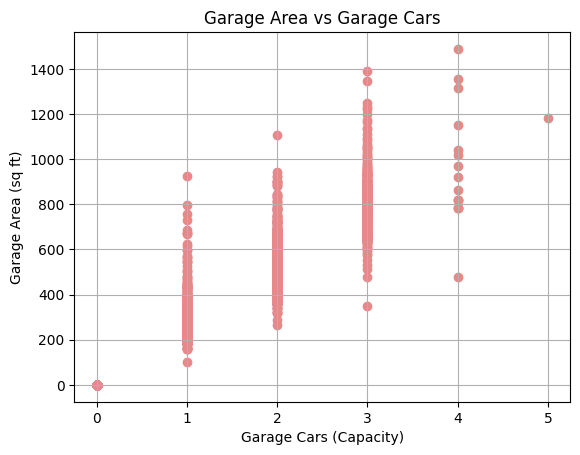

In [148]:
plt.scatter(dataset["Garage Cars"], dataset["Garage Area"], color='#E88888')
plt.title("Garage Area vs Garage Cars")
plt.xlabel("Garage Cars (Capacity)")
plt.ylabel("Garage Area (sq ft)")
plt.grid(True)
plt.show()

The scatterplot reveals a strong positive correlation between total basement area and finished basement area, with most data points forming a triangular cluster below the line where the two values would be equal. There are quite a few homes that have a total basement area but zero finished basement area, which suggests that many basements in the dataset are left unfinished.



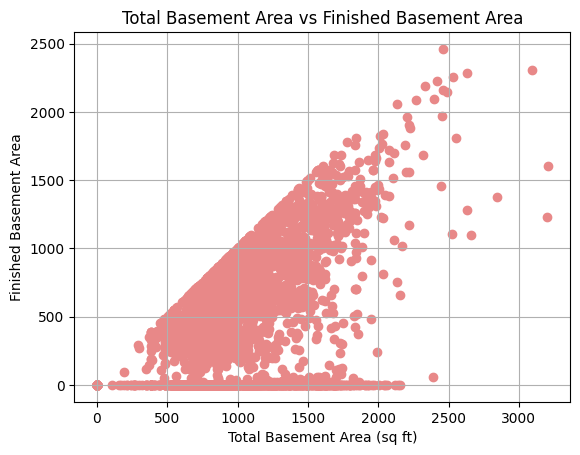

In [149]:
finished_basement = dataset["BsmtFin SF 1"] + dataset["BsmtFin SF 2"]

plt.scatter(dataset["Total Bsmt SF"], finished_basement, color='#E88888')
plt.title("Total Basement Area vs Finished Basement Area")
plt.xlabel("Total Basement Area (sq ft)")
plt.ylabel("Finished Basement Area")
plt.grid(True)
plt.show()

In [150]:
dataset['Kitchen Qual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa', 'Po'], dtype=object)

Each plot illustrates how overall quality relates to above ground living area, with the points colored according to different home quality features: pool quality, heating quality, fireplace quality, and kitchen quality. In general, homes with higher overall quality also have larger living spaces, no matter which feature you focus on. Looking at the pool quality plot, it’s clear that most houses have lower pool ratings and tend to be on the smaller side. The heating quality plot shows a wider range, with many homes achieving high ratings, especially as living area increases. For fireplace and kitchen quality, there’s a steady trend better overall quality usually goes hand in hand with higher ratings for these features, and you can see clear clusters of quality levels as living area changes.

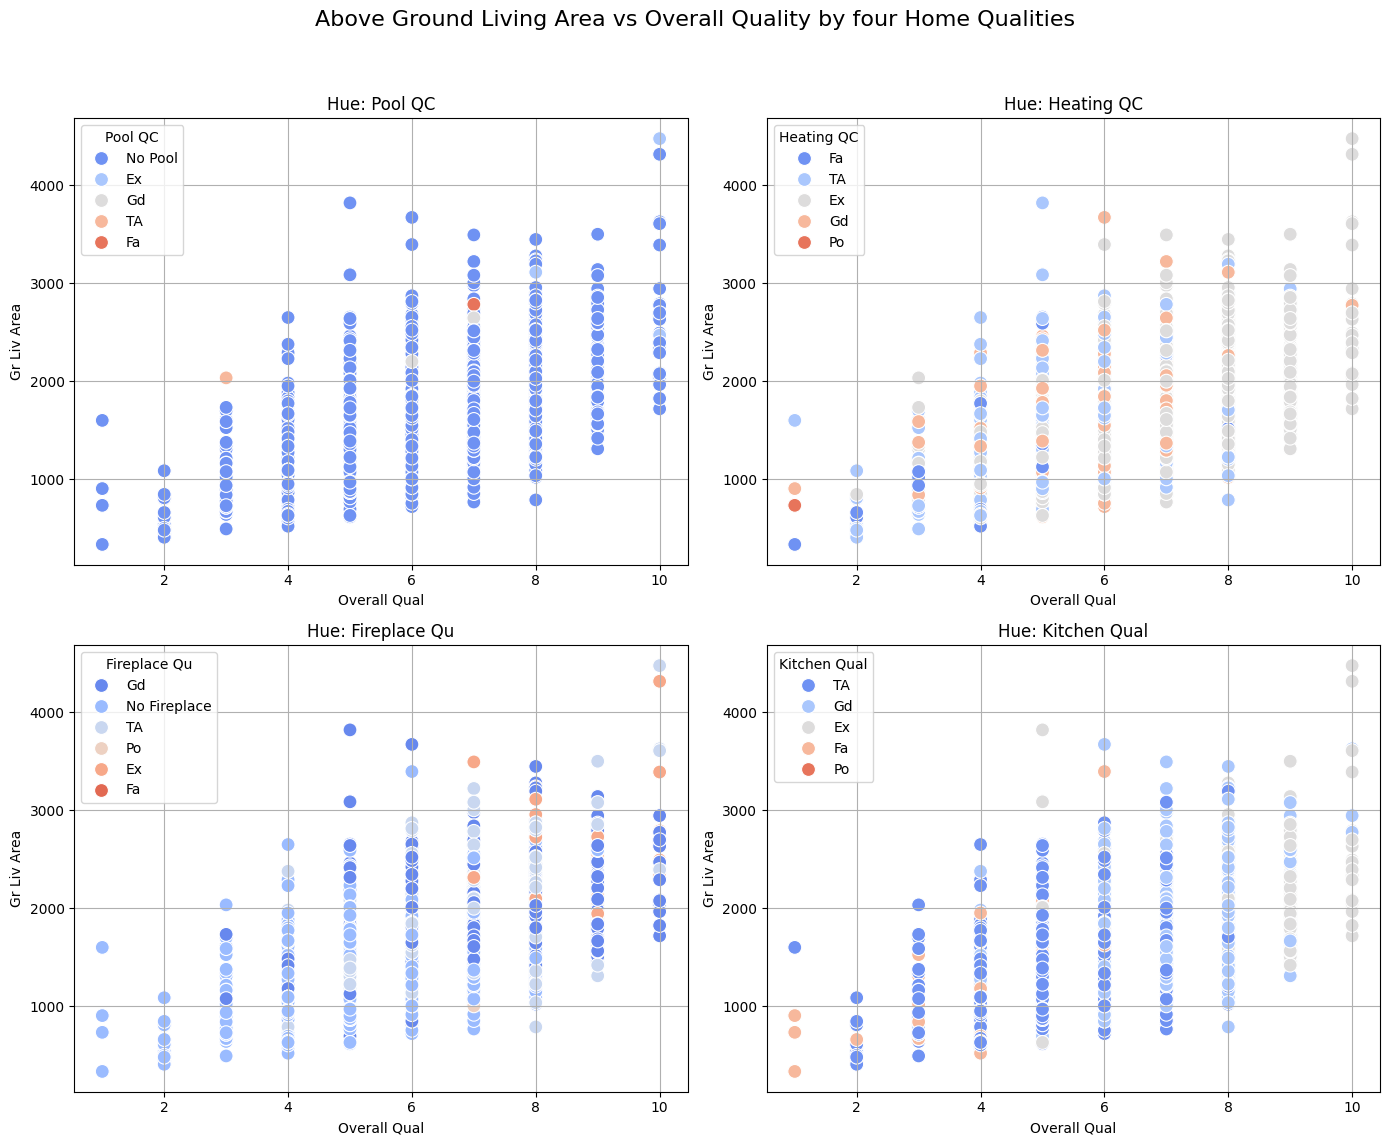

In [151]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Above Ground Living Area vs Overall Quality by four Home Qualities", fontsize=16)

# Pool QC
sns.scatterplot(data=dataset, x='Overall Qual', y='Gr Liv Area', hue='Pool QC', ax=axes[0, 0], palette='coolwarm', s=100)
axes[0, 0].set_title("Hue: Pool QC")
axes[0, 0].set_xlabel("Overall Qual")
axes[0, 0].set_ylabel("Gr Liv Area")
axes[0, 0].grid(True)

# Heating QC
sns.scatterplot(data=dataset, x='Overall Qual', y='Gr Liv Area', hue='Heating QC', ax=axes[0, 1], palette='coolwarm', s=100)
axes[0, 1].set_title("Hue: Heating QC")
axes[0, 1].set_xlabel("Overall Qual")
axes[0, 1].set_ylabel("Gr Liv Area")
axes[0, 1].grid(True)

# Fireplace Qu
sns.scatterplot(data=dataset, x='Overall Qual', y='Gr Liv Area', hue='Fireplace Qu', ax=axes[1, 0], palette='coolwarm', s=100)
axes[1, 0].set_title("Hue: Fireplace Qu")
axes[1, 0].set_xlabel("Overall Qual")
axes[1, 0].set_ylabel("Gr Liv Area")
axes[1, 0].grid(True)

# Kitchen Qual
sns.scatterplot(data=dataset, x='Overall Qual', y='Gr Liv Area', hue='Kitchen Qual', ax=axes[1, 1], palette='coolwarm', s=100)
axes[1, 1].set_title("Hue: Kitchen Qual")
axes[1, 1].set_xlabel("Overall Qual")
axes[1, 1].set_ylabel("Gr Liv Area")
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Train and evaluate the models

We train the cleaned dataset using 5 models: 
-Lasso and Ridge for Linear Regression with regulations 
-Random Forest, Gradient Boosting and XGBoost for esemble learning
-Random Forest will not have any regulations
-Gradient Boosting and XGBoost are fine-tuned with specific parameters to be more suitable for prediction and enhancing accuracy


In [152]:
# dividing the dataset
X = finaldata.drop(columns='SalePrice', axis=1)
y = finaldata['SalePrice']

In [153]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [154]:
# get models
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = [
    Ridge(alpha=10),
    Lasso(alpha=10),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=500, max_depth=3, min_samples_leaf=3, min_samples_split=5, subsample=1, loss='squared_error',random_state=42),
    XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=3, min_samples_leaf=3, min_samples_split=5, subsample=1, loss='squared_error',random_state=42)
]

-Below is the evaluation methods for these models, featuring Root mean square erro (RMSE), Mean absolute error (MAE) and R square score. We also provides plots to show the actual vs predicted prices for training and testing data respectively

-The results show Gradient Boosting performs the best, with XGBoost behind it. The linear models also perform very well, but cannot outperform the non-linear models except Random Forest which recieves no regulations thus is prone to overfitting more.



In [155]:
# evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

import matplotlib.pyplot as plt

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # metrics
    rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    mae = mean_absolute_error(y_test, test_preds)
    r2 = r2_score(y_test, test_preds)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R^2: {r2:.4f}")
    
    # plot the price (actual vs prediction)
    #train
    plt.figure(figsize=(6, 4))
    plt.scatter(y_train, train_preds)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model.__class__.__name__} - Actual vs Predicted Prices - Train Data')
    plt.show()
    
    #test
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, test_preds)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model.__class__.__name__} - Actual vs Predicted Prices - Test Data')
    plt.show()
    
    return rmse, mae, r2, test_preds


Model: Ridge
RMSE: 22969.30
MAE: 14889.27
R^2: 0.9345


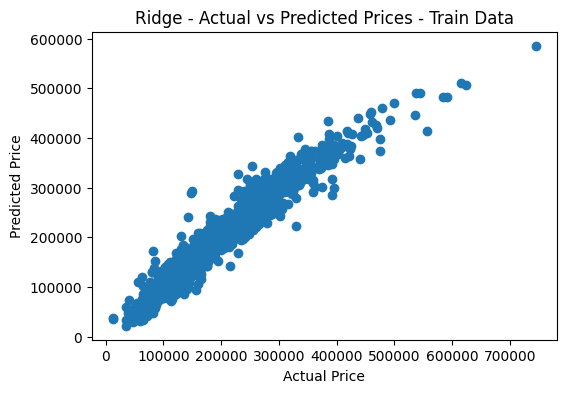

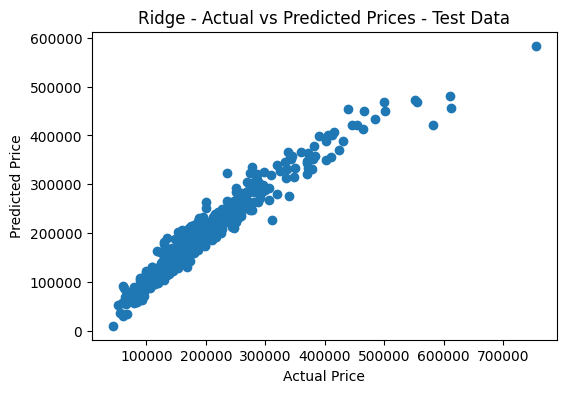

Model: Lasso
RMSE: 23236.01
MAE: 15028.58
R^2: 0.9330


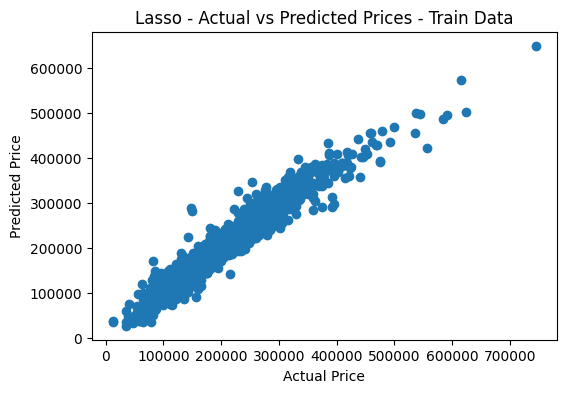

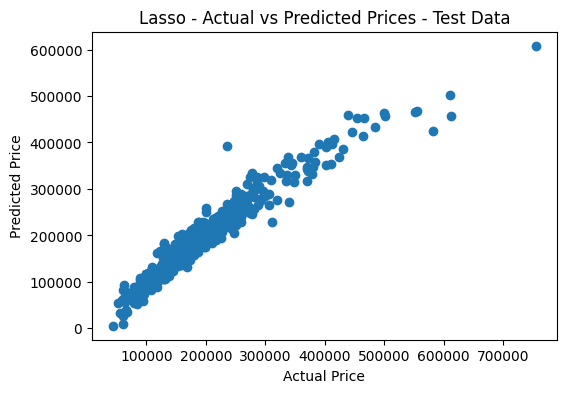

Model: RandomForestRegressor
RMSE: 24894.69
MAE: 15387.27
R^2: 0.9231


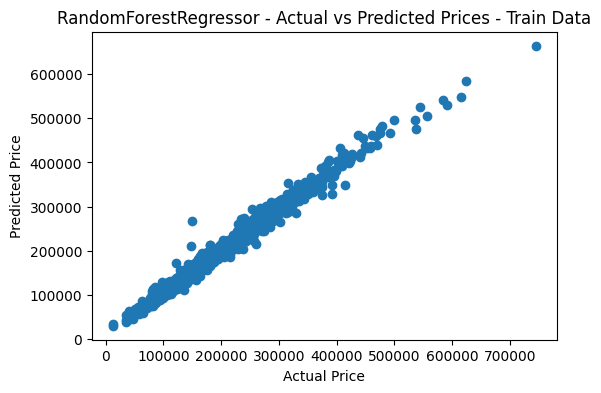

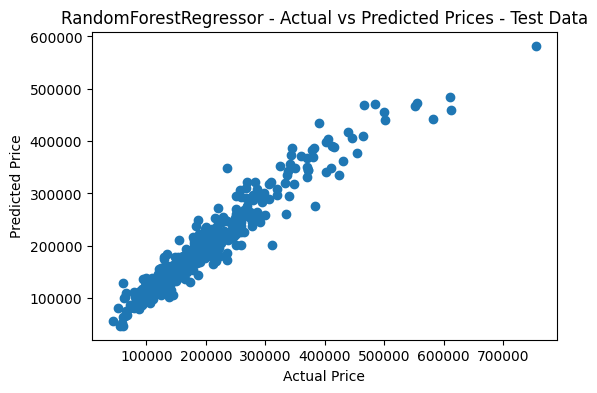

Model: GradientBoostingRegressor
RMSE: 19622.18
MAE: 13088.39
R^2: 0.9522


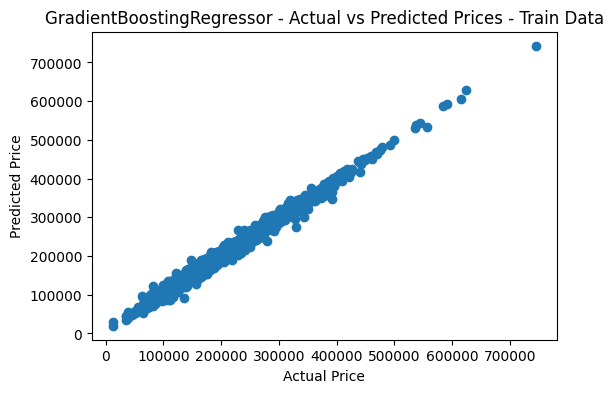

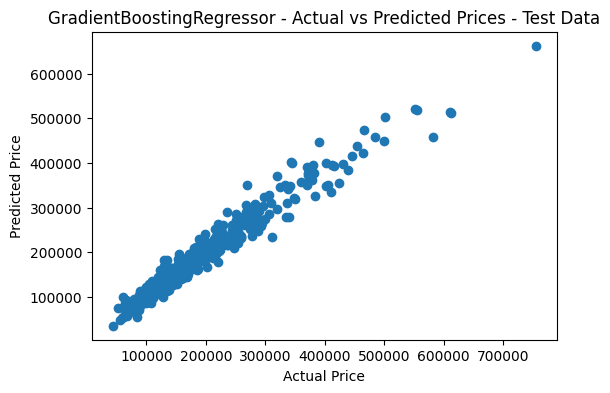

/Users/dat/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "loss", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBRegressor
RMSE: 20693.11
MAE: 13427.79
R^2: 0.9469


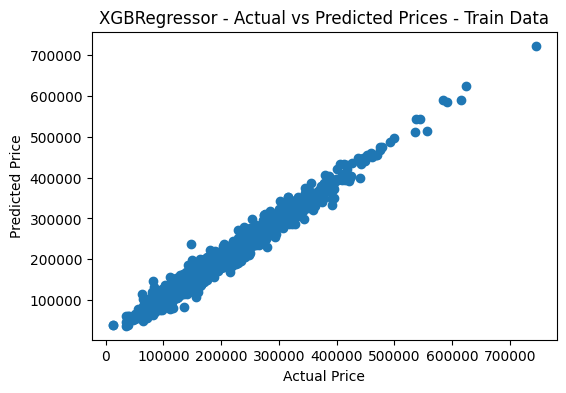

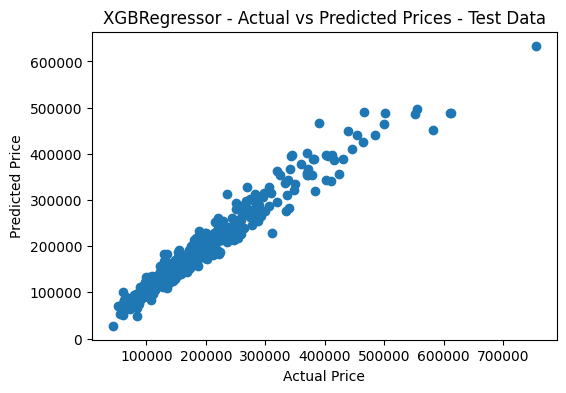

In [156]:
# train the models
results = [evaluate_model(model, X_train, X_test, y_train, y_test) for model in models]